<h1 style="text-align: center">
Machine Learning HW1 </br>
Perceptron in Python
</h1>

#### Full Name: Radin Cheraghi

#### Std. Number: 401105815

In this notebook we implement the Preceptron learning algorithm for diabetes detection.

In [185]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import random

The `dataset.csv` file should be supplied to you for this notebook. First we need to read and process this dataset to use for training. This dataset contains 9 columns. columns 1-8 are features of individuals and the final column is the label. The following process should be applied to data prior to training:

1.   Remove the rows containing zero values for `BMI`, `Gⅼuⅽose` and `BⅼooⅾPressure`.
2.   Transform the `Outⅽoⅿe` column for all data into `-1` and `1` for negative and positive label respectively.
3.   Normalize data using the minimum and maximum values in each feature.
4.   Divide the dataset into %85 training and %15 testing.


The `Dataset` class handles these operations for us. Complete the functions indicated with a `# ===TODO===` comment in the cell below:

In [186]:
data = pd.read_csv('Dataset.csv')
set_array = data.to_numpy()
print(set_array)

[[7 160 54 ... 0.588 39 True]
 [5 115 98 ... 0.209 28 True]
 [5 189 64 ... 0.583 29 True]
 ...
 [5 143 78 ... 0.19 47 False]
 [4 184 78 ... 0.264 31 True]
 [2 87 0 ... 0.773 25 False]]


In [187]:
class Dataset:
    """Reads and holds a dataset in memory"""
    def __init__(self, file_path: str):
        """Read samples from a csv file"""
        self.data = pd.read_csv(file_path)
        self.headers = list(self.data.columns)

    def index(self, i):
        """Returns data sample at given index"""
        return self.data.loc[i]

    def __len__(self):
        """Returns the length of dataset"""
        return len(self.data)

    def __iter__(self):
        return iter(self.data)

    def remove_zeros(self):
        """Remove samples that have zero values"""
        # ===TODO===
        self.data = self.data[(self.data['BloodPressure'] != 0) & (self.data['BMI'] != 0) & (self.data['Glucose'] != 0)]

    def normalize(self):
        """Normalize data"""
        # ===TODO===
        self.data['Outcome'] = self.data['Outcome'].apply(lambda x: 1 if x == True else -1)
        for feature in self.data.columns:
          if feature != 'Outcome':
            min = self.data[feature].min()
            max = self.data[feature].max()
            self.data[feature] = (self.data[feature] - min) / (max - min)

    def split(self):
        """Return 85 percent of data for training and 15 percent of data for testing (random)"""
        # ===TODO===
        set_array = self.data.to_numpy()
        train_data, test_data = train_test_split(set_array, test_size = 0.15, random_state = 42)
        return train_data, test_data

Next we implement the perceptron learning algorithm. We need to implement two functions, `test` and `train`. Complete the functions indicated with a `# ===TODO===` comment in the cell below to implement the following tasks:

1. Use the defined attributes for `__init__` to adjust the training and testing.
2. Implement the `train` function. Pay attention to save the weights for each iteration in `w_history` attribute.
3. In the `test` function use the `w_history` to generate an `accuracy_history` for the test set.
4. Plot this accuracy history using `matplotlib`.

In [271]:
def sign(v):
    """Simple sign step function"""
    if v >= 0:
        return 1
    else:
        return -1

class Perceptron:
    """Implementation of a simple preceptron"""
    def __init__(self, train_set, test_set, rate=0.01, max_iterations=1_000):
        self.train_set = train_set
        self.test_set = test_set
        self.rate = rate # adjust the rate of which the model learns
        self.trained = False # we set this to true when model is trained to avoid retraining
        self.max_iterations = max_iterations # force break after this many iterations.
        self.w_history = [] # save the weight history in each iteration to plot accuracy
        self.w = np.random.normal(0,0.1,len(self.train_set[0])) # weights

    def return_mis_classified(self):
        misclassified_idx = []
        for idx in range(len(self.train_set)):
            x = self.train_set[idx].copy()
            y = x[len(x) - 1]
            x[len(x) - 1] = 1
            if y * np.dot(self.w, x) < 0:
              misclassified_idx.append(idx)
        return misclassified_idx

    def train(self):
        """Train Perceptron using the train_set"""
        # ===TODO===
        for iteration in range(self.max_iterations):
          misclassified_idx = self.return_mis_classified()
          if len(misclassified_idx) != 0:
            # idx = random.randint(0,len(misclassified_idx) - 1)
            for idx in misclassified_idx:
              x = self.train_set[idx].copy()
              y = x[len(x) - 1]
              x[len(x) - 1] = 1
              self.w += self.rate * y * x
          self.w_history.append(self.w.copy())
          # print(self.w)
          # print(1 - (len(misclassified_idx) / len(self.train_set)))
        self.trained = True
        self.w_history.append(self.w)

    def test(self):
        """Tests a trained model on test_set and plots accuracy for weight history"""
        if not self.trained:
            return
        # ===TODO===
        # Don't forget the plot the accuracy history change as the model was training!
        accuracy_history = []
        for w in self.w_history:
          mis_classified_counts = 0
          for idx in range(len(self.test_set)):
              x = self.test_set[idx].copy()
              y = x[len(x) - 1]
              x[len(x) - 1] = 1
              if y * np.dot(w, x) < 0:
                mis_classified_counts += 1
          # print(w)
          accuracy_history.append(1 - (mis_classified_counts / len(self.test_set)))
        plt.plot(accuracy_history)
        plt.xlabel('weight index')
        plt.ylabel('accuracy')
        plt.show()
        # print(max(accuracy_history))


Now we train and test the model. You **don't** need to change anything in the following cell. **You should expect a final accuracy of > 70%.**

read 768 data samples from Dataset.csv
pruned dataset to 724 samples
normalized data according to min max scaling
splited data into training (size=615) and testing (size=109) sets


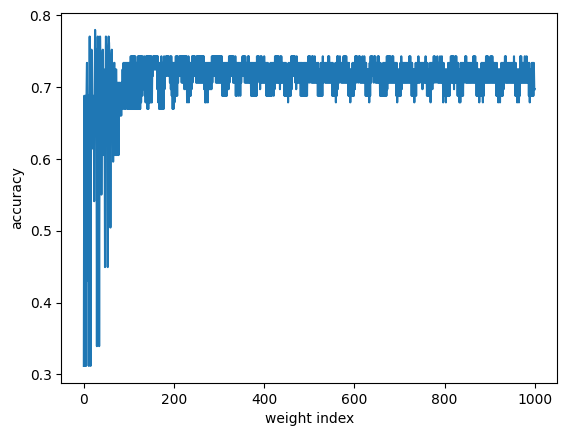

In [272]:
DATASET_FILE_PATH = "Dataset.csv"

dataset = Dataset(DATASET_FILE_PATH)
print(f"read {len(dataset)} data samples from {DATASET_FILE_PATH}")

dataset.remove_zeros()
print(f"pruned dataset to {len(dataset)} samples")

dataset.normalize()
print('normalized data according to min max scaling')

training_set, testing_set = dataset.split()
print(f"""splited data into training \
(size={len(training_set)}) and \
testing (size={len(testing_set)}) sets""")

diab = Perceptron(training_set, testing_set)
diab.train()
diab.test()
